# Einstieg Visualisierungen mit seaborn

Neben Matplotlib ist seaborn eine häufig verwendete Python-Bibliothek zum Plotten und zur Visualisierung von Daten. [Seaborn](https://seaborn.pydata.org/) baut in gewisser Weise auf der Bibliothek Matplotlib auf und arbeitet gut mit ihr zusammen - aber auch die Integration von pandas-Datenstrukturen ist gegeben. Hier finden Sie eine [Übersicht](https://seaborn.pydata.org/examples/index.html) zu möglichen Visualisierungsoptionen. Und selbstverständlich gibt es ein ausführliches [Tutorial](https://seaborn.pydata.org/tutorial.html). Seaborn hat eine kürzere und einfachere Syntax und bietet schon gute Out-of-the-Box Formatierungen der Diagramme. Das wollen wir uns im Folgenden ansehen. Zuerst schauen wir uns die Syntax wieder an einem einfachen Liniendiagramm an.

## Import

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

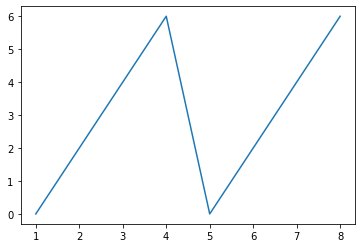

In [2]:
x = [ 1, 2, 3, 4, 5, 6, 7, 8 ]
y = [ 0, 2, 4, 6, 0, 2, 4, 6 ]

sns.lineplot(x=x, y=y);

## Einlesen der Daten

Nur eine Zeile Code - und wir haben direkt ein einfaches Liniendiagramm. Aber schauen wir uns nun einmal an, wie wir seaborn auf unseren Daten anwenden können.

In [3]:
df = pd.read_json('240301-AvH-letters-with-tokens.json')
df.loc[:, 'date'] = pd.to_datetime(df.loc[:, 'date'], unit='ms')
print(df.shape)
df.head(3)

(296, 12)


,reference,edition_id,sender_id,sender,receiver_id,receiver,date,place_id,place,text,token,nr_token
0,https://edition-humboldt.de/H0002655,#AVHR,http://d-nb.info/gnd/118554700,Alexander von Humboldt,http://d-nb.info/gnd/118805193,Samuel Thomas von Soemmerring,1793-12-05,http://sws.geonames.org/6556797,Berg,"Berg , den 5 . Dez Dezember 1793 Ihr Brief, li...","[berg, den, 5, dez, dezember, 1793, ihr, brief...",252
1,https://edition-humboldt.de/H0002730,#AVHR,http://d-nb.info/gnd/118554700,Alexander von Humboldt,http://d-nb.info/gnd/118805193,Samuel Thomas von Soemmerring,1794-02-06,http://sws.geonames.org/2951825,Bayreuth,"Der Ueberbringer dieses Briefchens, lieber Soe...","[der, ueberbringer, dieses, briefchens, lieber...",143
2,https://edition-humboldt.de/H0002729,#AVHR,http://d-nb.info/gnd/118554700,Alexander von Humboldt,http://d-nb.info/gnd/118805193,Samuel Thomas von Soemmerring,1795-06-07,http://sws.geonames.org/2951825,Bayreuth,"Verehrungswerther Freund, Ich will Ihnen ein B...","[verehrungswerther, freund, ich, will, ihnen, ...",591


### Balkendiagramm

Die Methode `sns.barplot()` verlangt x- und y-Werte. Die Top 10-Werte übergeben wir aus der Series, in der wir die Werte gezählt haben, mit `.index` und `.values`. Wenn wir mit `ax=ax` die *axes* zugewiesen haben, dann können wir wie bei Matplotlib die Formatierungen anpassen.

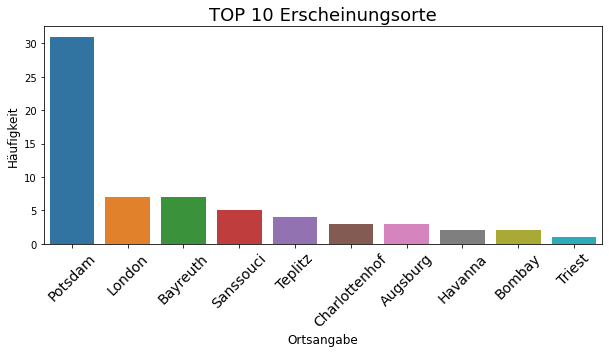

In [112]:
fig, ax = plt.subplots(figsize=(10,4))

# Erstellen der zu plottenden Series 
df_top_places = df.loc[:, 'place'].value_counts().head(10)

# Plotten mit seaborn
sns.barplot(x=df_top_places.index, y=df_top_places.values, ax=ax)

# Formatierung der Überschrift des Diagramms
ax.set_title('TOP 10 Erscheinungsorte',
             size=18)

# Formatierung und Beschriftung von x-Achse und y-Achse
ax.set_ylabel('Häufigkeit',
              size=12
             )

ax.set_xlabel('Ortsangabe',
              size=12,
             )

ax.set_xticklabels(df_top_places.index, rotation=45, ha='center', size=14)

plt.show()

Natürlich gibt es mal wieder weitere Varianten, mit denen sich mit Hilfe von seaborn Daten visualisieren lassen. Hier zählen wir zunächst wiederum die Werte in der Spalte `place` und erstellen dann aus der erhaltenen Series mit `to_frame()` einen Dataframe. Diesmal weisen wir in der `sns.barplot()`-Methode unter dem Argument `data` die ersten zehn Zeilen dieses Dataframes als zu plottende Daten zu. Dann bestimmen wir wieder die x- und y-Werte. Mit `orient='h'` können wir die horizontalen Balken erstellen.

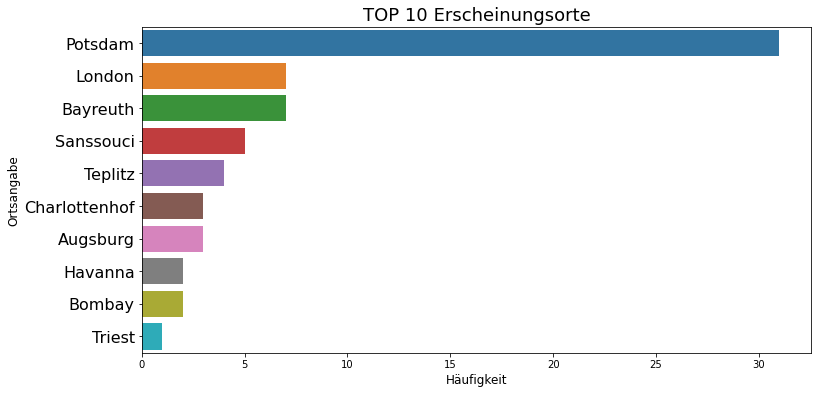

In [110]:
fig, ax = plt.subplots(figsize=(12,6))

df_top_places = df.loc[:, 'place'].value_counts()
df_top_places = df_top_places.to_frame()

sns.barplot(data=df_top_places[:10], 
            x='place',
            y=df_top_places.index[:10], 
            ax=ax,
            orient='h')

ax.set_title('TOP 10 Erscheinungsorte',
             size=18)

ax.set_xlabel('Häufigkeit', 
              size=12)

ax.set_ylabel('Ortsangabe',
              size=12
             )

ax.set_yticklabels(labels=df_top_places.index[:10],
                   size=16);

### Visualisierung der Verteilung

Seaborn stellt mehrere Möglichkeiten zur Verfügung, um mit nur einer Zeile Verteilungen zu visualisieren. Hier zeigen wir in einer Grafik die 3 gängigsten Varianten: `histplot()`, `violinplot()` und `boxplot()`. Dazu übergeben wir jeweils unseren Dataframe und weisen die Spalte `nr_token` dem Argument für die x-Werte zu. Beim Histogramm müssen wir die Anzahl der *bins* festlegen, bei den anderen weisen wir mit der Indexierung auf `ax[i]` die Zeile im Gesamtdiagramm zu. Schließlich legen wir noch die Farben fest. 

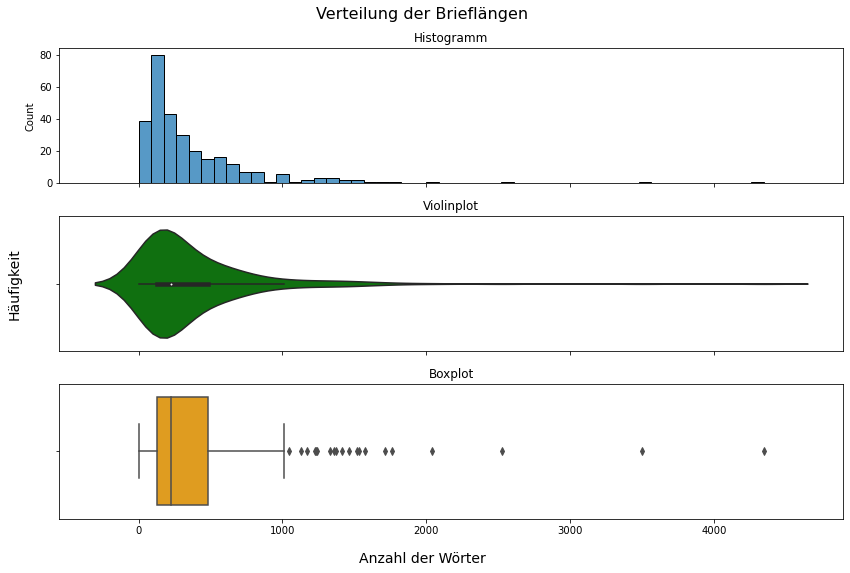

In [116]:
fig, ax = plt.subplots(nrows=3, 
                       figsize=(12,8), 
                       sharex=True)

sns.histplot(data=df, x='nr_token', ax=ax[0], bins=50)
sns.violinplot(data=df, x='nr_token', ax=ax[1], color='green')
sns.boxplot(data=df, x='nr_token', ax=ax[2], color='orange')


ax[0].set_title('Histogramm')
ax[1].set_title('Violinplot')
ax[2].set_title('Boxplot')

# einzelne xlabel für die Unterdiagramme ausschalten
for x in range(3):
    ax[x].set_xlabel(xlabel='')

# Beschriftungen des Gesamtdiagramms
fig.suptitle('Verteilung der Brieflängen',
             size=16)

fig.supylabel('Häufigkeit',
           size=14)

fig.supxlabel('Anzahl der Wörter',
           size=14)

fig.tight_layout();

Boxplots sind grafische Darstellungen der Datenverteilung, die fünf wesentliche Kennzahlen hervorheben: das Minimum, das erste Quartil (Q1), den Median, das dritte Quartil (Q3) und das Maximum. Die 'Box' im Boxplot repräsentiert den Interquartilbereich (IQR), der sich zwischen dem ersten und dritten Quartil erstreckt und den mittleren 50% der Daten entspricht. Der 'Whisker' (Schnurrbart) erstreckt sich von der Box bis zum höchsten bzw. niedrigsten Wert, der innerhalb eines bestimmten Bereichs liegt, üblicherweise 1,5 * IQR über dem dritten Quartil und unter dem ersten Quartil. Datenpunkte, die außerhalb der Whiskers liegen, werden als Ausreißer betrachtet und oft durch Punkte oder Sterne dargestellt. Boxplots bieten eine effiziente Möglichkeit, die Verteilung von Daten zu visualisieren, zentrale Tendenzen, die Streuung und potenzielle Ausreißer in einem Datensatz schnell zu identifizieren.

Violinplots nutzen ähnliche Elemente wie Boxplots, um die Verteilung von Datenpunkten detailliert darzustellen. Ähnlich wie Boxplots markieren sie den Median und oft auch die Quartile der Daten, aber zusätzlich visualisieren sie die Dichteverteilung der Daten entlang der Achse, was zu ihrer violinenähnlichen Form führt. Diese Form ermöglicht es, sowohl die Verteilungsbreite als auch die Spitzen in den Daten auf einen Blick zu erfassen, wobei breitere Abschnitte des 'Violinkörpers' eine höhere Dichte von Datenpunkten anzeigen. Violinplots sind besonders nützlich, um mehrere Datensätze oder Gruppen zu vergleichen, da sie nicht nur Unterschiede in den zentralen Tendenzen, sondern auch in den Verteilungsformen hervorheben. Sie bieten eine tiefere Einsicht in die Datenstruktur als Boxplots, indem sie sowohl die Verteilung der Daten als auch potenzielle Ausreißer innerhalb des gleichen Diagramms visualisieren.